# [exp 01]: Enhance Images using Edge detection and Contoures techniques

# Introduction

During our project we often use grayscale image instead of RGBscale due to grayscale images are simpler to process and require less memory and computational resources as we also don't care about the RGB colors in most of our tasks during the project.

Enhancing images with image processing techniques for making object detection approach require identifing the objects features in the image, basically it's done by showing up the edges of the object and take the contours of these edges (for edge detection method we use Canny edge detection algorithm and find EXTERNAL contours for the edges).

Finding the Contours will provide a way to identify the objects within an image. By tracing the contours around objects, image processing algorithms can detect and recognize shapes of the objects and make tracking for them.

Using Canny edge detection algorithm in conjunction with contours will help to identify and outline the boundaries of objects within an image accurately, making the first step with image processing to detect the objects in the image.

# Background

The idea of using Canny edge detection is to identify the edges of objects in an image, it detects sudden changes in pixel intensity (such as sharp transitions in color or grayscale) and marks them as edges[we are not going to delve deeply with the explanation of the algorithm right now until we deal with the details of algorithm as in expt_??].

After applying Canny edge detection, we can identify and extract EXTERNAL contours from the edge-detected image, where Contours will provide a set of points that define the boundaries of the objects or a part of an object in the image.

# Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Convert Image to Gray

(-0.5, 860.5, 492.5, -0.5)

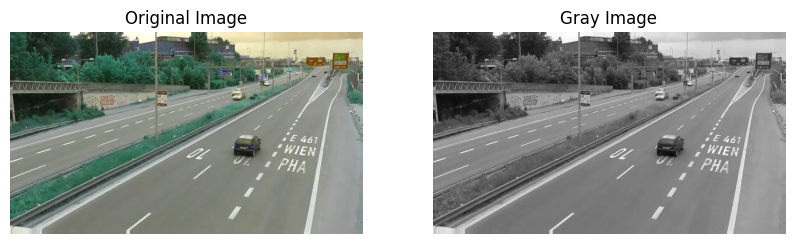

In [17]:
img = cv2.imread("img/01/img_01_1.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

In [13]:
def img_to_edges(img, blur_kernel=(5, 5)):
    img_med = np.median(img)
    img_med_lower = int(max(0, 0.7 * img_med))
    img_med_upper = int(min(255, 1.3 * img_med))
    img_blur = cv2.blur(img, blur_kernel)
    img_edges = cv2.Canny(img_blur, img_med_lower, img_med_upper)
    return img_edges

(-0.5, 860.5, 492.5, -0.5)

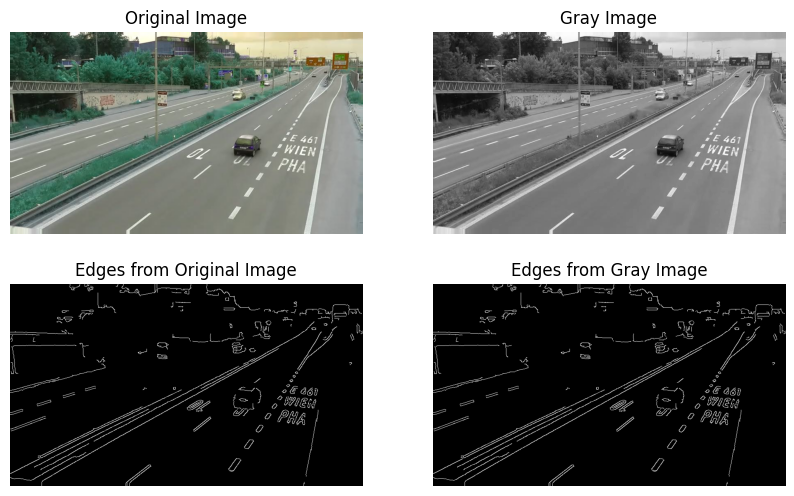

In [14]:
img_edges = img_to_edges(img)
img_edges = img_to_edges(img_gray)


plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges from Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges from Gray Image')
plt.axis('off')

## get Contours from Edges and draw it

In [15]:
def edges_to_contours(edges, color=(255, 255, 255), thickness=3):
    contours, _ = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    edges_contours = cv2.drawContours(
        np.zeros_like(edges), contours, -1, color, thickness)

    return edges_contours

(-0.5, 860.5, 492.5, -0.5)

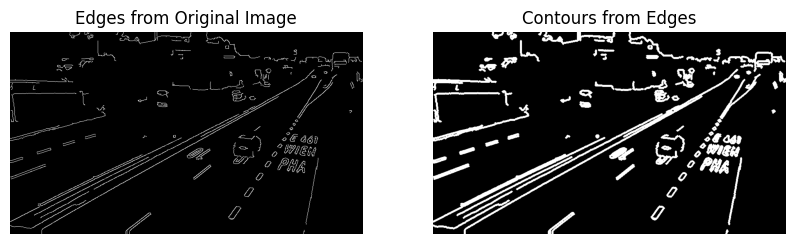

In [16]:
img_edges_contours = edges_to_contours(img_edges)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_edges, cmap='gray')
plt.title('Edges from Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_edges_contours, cmap='gray')
plt.title('Contours from Edges')
plt.axis('off')